In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

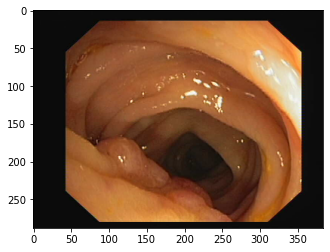

In [51]:
img_bgr = cv2.imread('./images/1.bmp')
img_hsv = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2HSV)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [52]:
hsvChannels = cv2.split(img_hsv)
H = hsvChannels[0]
S = hsvChannels[1]
V = hsvChannels[2]
print(max(H.flatten()), max(S.flatten()), max(V.flatten()))

179 255 255


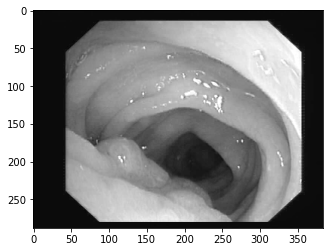

In [53]:
plt.imshow(V,  'gray')

(array([2.8112e+04, 6.4000e+01, 6.8000e+01, 1.7900e+02, 3.1800e+02,
        4.9200e+02, 1.4040e+03, 1.1080e+03, 2.9470e+03, 3.9110e+03,
        9.2400e+03, 1.8694e+04, 1.1515e+04, 9.6270e+03, 8.3250e+03,
        5.4880e+03, 2.1770e+03, 8.5400e+02, 4.9800e+02, 4.0100e+02,
        4.1500e+02, 6.6400e+02, 2.8300e+02, 3.5000e+02, 2.3900e+02,
        1.6900e+02, 3.0900e+02, 1.2900e+02, 6.2000e+01, 7.0000e+01,
        2.5100e+02, 1.4000e+01, 3.5000e+01, 4.1000e+01, 5.4000e+01,
        5.9000e+01, 1.8000e+01, 1.2000e+01, 3.2000e+01, 2.3000e+01,
        2.6000e+01, 2.3000e+01, 1.3000e+01, 2.1000e+01, 6.0000e+00,
        3.9000e+01, 1.1000e+01, 4.0000e+00, 1.5000e+01, 1.3000e+01,
        1.0000e+01, 1.2000e+01, 9.0000e+00, 6.0000e+00, 1.0000e+01,
        7.0000e+00, 3.0000e+00, 7.0000e+00, 3.0000e+00, 0.0000e+00,
        8.3000e+01, 0.0000e+00, 4.0000e+00, 5.0000e+00, 9.0000e+00,
        1.5000e+01, 4.0000e+00, 1.0000e+00, 3.2000e+01, 1.0000e+00,
        7.0000e+00, 1.0000e+00, 0.0000e+00, 1.30

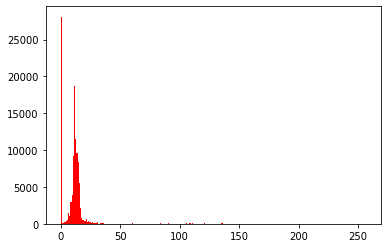

In [54]:
plt.hist(H.flatten(), 256, [0,256], color='r')

In [77]:
# H_mean = np.mean(H)
# H_std = np.std(H)
# h_v = H_mean + H_std * 1.1
V_mean = np.mean(V)
V_std = np.std(V)
t_v = V_mean + V_std * 1
S_mean = np.mean(S)
S_std = np.std(S)
t_s = S_mean - S_std * 0
width, heigh = H.shape
print(S_mean, S_std, t_v, t_s)

126.48892324942129 80.11392421511205 186.8520457246294 126.48892324942129


In [267]:
t_v = 240
t_s = 150

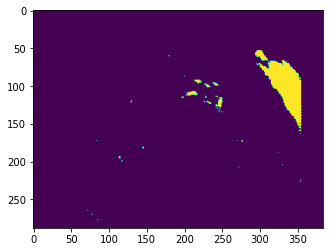

In [74]:
# lower = np.array([0, 0, t_v])
# upper = np.array([360,t_s,255])

lower = np.array([0, 0, t_v])
upper = np.array([179,t_s,255])
 
mask = cv2.inRange(img_hsv, lower, upper)
res = cv2.bitwise_and(img_bgr, img_bgr, mask=mask)
plt.imshow(mask)

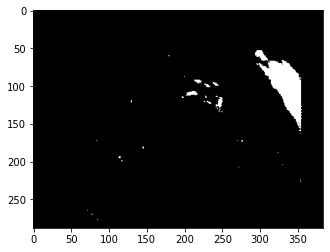

In [75]:
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(mask_rgb)

In [71]:
ret,thresh1 = cv2.threshold(mask,127,255,cv2.THRESH_BINARY)

In [46]:
print(thresh1.shape)

(233, 426)


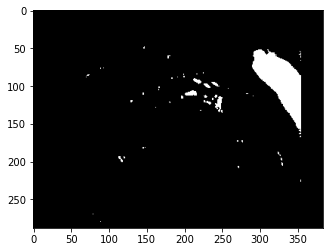

In [76]:
plt.imshow(thresh1, 'gray')

In [215]:
thresh1_width, thresh1_heigh = thresh1.shape

n = 2
k = 1
for i in range(n):
    for j in range(n):
        if (thresh1_width//n)*(i+1) <= thresh1_width & (thresh1_heigh/n)*(j+1) <= thresh1_heigh:
            sub_images[k] = thresh1[(thresh1_width//n)*(i):(thresh1_width//n)*(i+1), (thresh1_heigh//n)*(j):(thresh1_heigh//n)*(j+1)]
            k = k+1
        else:
            
            sub_images[k] = thresh1[(thresh1_width//n)*(i):thresh1_width, (thresh1_heigh//n)*(j):thresh1_heigh]
            k = k + 1

TypeError: unsupported operand type(s) for &: 'int' and 'float'

In [216]:
M = thresh1.shape[0]//4 + 1
N = thresh1.shape[1]//4 + 1
# tiles = []
# for x in range(0,thresh1.shape[0],M):
#     for y in range(0,thresh1.shape[1],N):
#         tiles = thresh1[x:x+M,y:y+N]
tiles = [thresh1[x:x+M,y:y+N] for x in range(0,thresh1.shape[0],M) for y in range(0,thresh1.shape[1],N)]

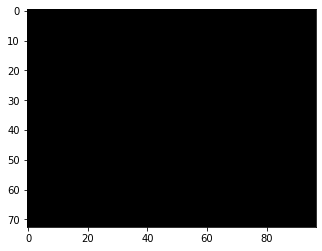

In [201]:
plt.imshow(tiles[0], cmap='gray')

(73, 97) (288, 384)


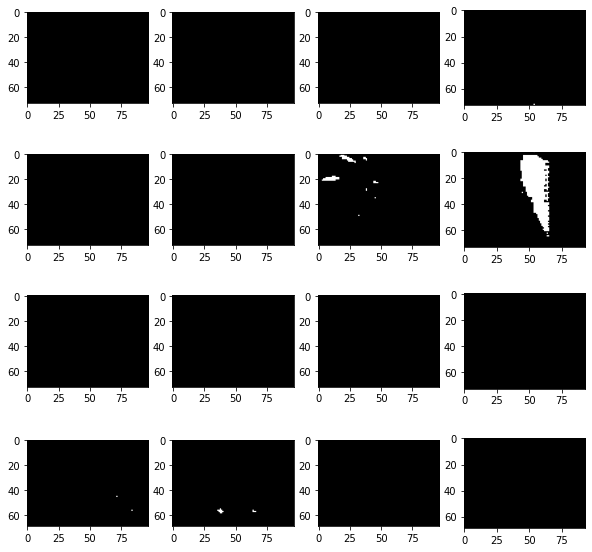

In [217]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(tiles[i], cmap='gray')
    
print(tiles[2].shape, thresh1.shape)

In [218]:
def area_cal(img):
    area = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i, j] == 255:
                area += 1
    precentage = area/(img.shape[0]*img.shape[1])
    return area, precentage

In [219]:
area_1, precentage_1 = area_cal(thresh1)
print(area_1)

924


In [220]:
print(precentage_1)

0.008355034722222222


(288, 384)


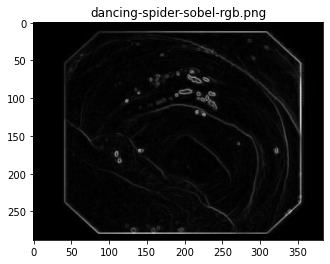

In [291]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
img = np.array(Image.open('./images/2.bmp')).astype(np.uint8)

# Sobel Operator
h, w, d = img.shape

# define filters
horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # s1

# define images with 0s
newgradientImage = np.zeros((h, w, d))

# offset by 1
for channel in range(d):
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            horizontalGrad = (horizontal[0, 0] * img[i - 1, j - 1, channel]) + \
                             (horizontal[0, 1] * img[i - 1, j, channel]) + \
                             (horizontal[0, 2] * img[i - 1, j + 1, channel]) + \
                             (horizontal[1, 0] * img[i, j - 1, channel]) + \
                             (horizontal[1, 1] * img[i, j, channel]) + \
                             (horizontal[1, 2] * img[i, j + 1, channel]) + \
                             (horizontal[2, 0] * img[i + 1, j - 1, channel]) + \
                             (horizontal[2, 1] * img[i + 1, j, channel]) + \
                             (horizontal[2, 2] * img[i + 1, j + 1, channel])

            verticalGrad = (vertical[0, 0] * img[i - 1, j - 1, channel]) + \
                           (vertical[0, 1] * img[i - 1, j, channel]) + \
                           (vertical[0, 2] * img[i - 1, j + 1, channel]) + \
                           (vertical[1, 0] * img[i, j - 1, channel]) + \
                           (vertical[1, 1] * img[i, j, channel]) + \
                           (vertical[1, 2] * img[i, j + 1, channel]) + \
                           (vertical[2, 0] * img[i + 1, j - 1, channel]) + \
                           (vertical[2, 1] * img[i + 1, j, channel]) + \
                           (vertical[2, 2] * img[i + 1, j + 1, channel])

            # Edge Magnitude
            mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
            # Avoid underflow: clip result
            newgradientImage[i - 1, j - 1, channel] = mag

# now add the images r g and b
rgb_edge = newgradientImage[:,:,0] + newgradientImage[:,:,1] + newgradientImage[:,:,2]

print(rgb_edge.shape)

plt.figure()
plt.title('dancing-spider-sobel-rgb.png')
plt.imsave('dancing-spider-sobel-rgb.png', rgb_edge, cmap='gray', format='png')
plt.imshow(rgb_edge, cmap='gray')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


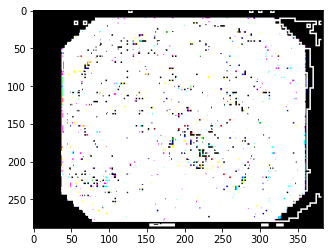

In [296]:
merged = cv2.merge([newgradientImage[:,:,0], newgradientImage[:,:,1], newgradientImage[:,:,2]])
# img_hsv = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2HSV)
# merged_rgb = cv2.cvtColor(merged, cv2.COLOR_BGR2RGB)
plt.imshow(merged)

In [300]:
print(newgradientImage[:,44,0])

[  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.          13.03840481   9.05538514   8.60232527  18.38477631
  56.30275304 178.19652073 246.10973162 172.58621034  73.59347797
  16.55294536  14.2126704   21.21320344  40.24922359  53.85164807
  58.85575588  59.22837158  59.00847397  59.68249325  57.27128425
  39.01281841  37.57658846  46.38965402  66.          89.05054744
 113.84199577 109.772492   100.84641788  69.12307864  46.04345773
  31.144823    41.23105626  74.72616677 116.36150566 132.85330256
 121.03718437  9

In [1]:
import numpy as np
import cv2

image = cv2.imread("./images/lenna.bmp")
cv2.imshow("Original",image)
# cv2.waitKey(0)

#R、G、B分量的提取
# (B,G,R) = cv2.split(image)#提取R、G、B分量
# cv2.imshow("Red",R)
# cv2.imshow("Green",G)
# cv2.imshow("Blue",B)
# cv2.waitKey(0)